In [ ]:
import pandas as pd
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('reviews_Health_and_Personal_Care.json.gz')
df

FileNotFoundError: [Errno 2] No such file or directory: 'reviews_Health_and_Personal_Care.json.gz'

In [ ]:
df[df["asin"] == "B001KXZ808"].overall.value_counts()

overall
5.0    9157
4.0    1145
3.0     393
1.0     390
2.0     280
Name: count, dtype: int64

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,date,time,day_of_week
1205029,A23RL20NW88758,B001KXZ808,NaN,"[0, 0]",11/2/2012:Almost a year to the day since purch...,1.0,Totally disappointed in its poor performance a...,1322006400,2011-11-23,2011-11-23,00:00:00,Wednesday
1205030,A2VQV71AFSUWU1,B001KXZ808,NaN,"[0, 0]","1) ""FREE EatSmart Body Tape Measure now includ...",3.0,Poor instructions,1365984000,2013-04-15,2013-04-15,00:00:00,Monday
1205031,AR63VIREUKFJH,B001KXZ808,NaN,"[0, 0]",1. Scale came with batteries. Small touch but ...,5.0,Very satisfied and impressed,1295395200,2011-01-19,2011-01-19,00:00:00,Wednesday
1205032,A35T2ZU638VHJY,B001KXZ808,NaN,"[0, 0]","1 star - Highly inaccurate, tried on several d...",5.0,Didnt work for us. - UPDATED -,1364515200,2013-03-29,2013-03-29,00:00:00,Friday
1205033,A3AZXNYM5E1O2J,B001KXZ808,NaN,"[0, 0]",1st one I ordered had a minor LCD problem. Had...,5.0,Great Product,1364688000,2013-03-31,2013-03-31,00:00:00,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...
1216389,A2RR77BJOMFR4S,B001KXZ808,Zoey,"[0, 0]",The scale is good and I like how easy it is to...,4.0,"Wonderful Scale, But The Batteries Included We...",1378771200,2013-09-10,2013-09-10,00:00:00,Tuesday
1216390,A3K9AOX3G51QP4,B001KXZ808,zombilex,"[0, 0]","I step on, it turns right on and calculates my...",4.0,"Six months later, still works quickly",1403308800,2014-06-21,2014-06-21,00:00:00,Saturday
1216391,A39BD7SRIMTFPC,B001KXZ808,zookie,"[0, 0]","Love this scale....simple to use, easy to read...",5.0,Love this scale,1384819200,2013-11-19,2013-11-19,00:00:00,Tuesday
1216392,A2T7W7RZN6LCWJ,B001KXZ808,"Z. Pabon ""La Boricua""","[1, 1]",I received this scale about 2 weeks ago and th...,3.0,Eat Smart Precision Scale Not so Precise,1284595200,2010-09-16,2010-09-16,00:00:00,Thursday


In [ ]:
# top_1000[top_1000["asin"] == "B001KXZ808"].overall.value_counts()
# ratings_distribution = {
#     5.0: 812,
#     4.0: 104,
#     1.0: 37,
#     3.0: 25,
#     2.0: 22
# }

# # Creating a bar graph
# plt.figure(figsize=(10, 6))  # Optional: Adjusts the size of the figure
# plt.bar(ratings_distribution.keys(), ratings_distribution.values(), color='blue')

# plt.xlabel('Rating')  # Label for the x-axis
# plt.ylabel('Count')  # Label for the y-axis
# plt.title('Distribution of overall score')  # Title of the graph
# plt.xticks(list(ratings_distribution.keys()))  # Ensure we have a tick for every rating value

# # Display the plot
# plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime
# Convert timestamp strings to datetime objects for analysis
df_instance['reviewTime'] = pd.to_datetime(df_instance['reviewTime'], format='%m %d, %Y')
# Extract date, time, day of week, and hour for further analysis
df_instance['date'] =df_instance['reviewTime'].dt.date
df_instance['time'] = df_instance['reviewTime'].dt.time
df_instance['day_of_week'] = df_instance['reviewTime'].dt.day_name()
# Message count analysis
# Count of messages per day
df_instance = df[df["asin"] == "B001KXZ808"]
sorted_df =df_instance.sort_values(by='date', ascending=False)
top_1000 = sorted_df.head(1000)
pd.set_option('display.max_colwidth', 1000)
print(top_1000.head(1)['reviewText'])

1210551    We have had this scale for almost a year and a half; it is working really well overall. It is considerably more consistent and our favorite out of all of the scales that we have owned. Sometimes it does like to fluctuate the poundage on you and you have to weigh a few times to get a consistent reading. (Reason for the 4 not 5 stars.)My wife also says that one of her main downsides is that she feels like it is a little delicate with it being glass with our kids. But in saying that, with our kids, this scale gets rough housed and it is holding up very well.
Name: reviewText, dtype: object


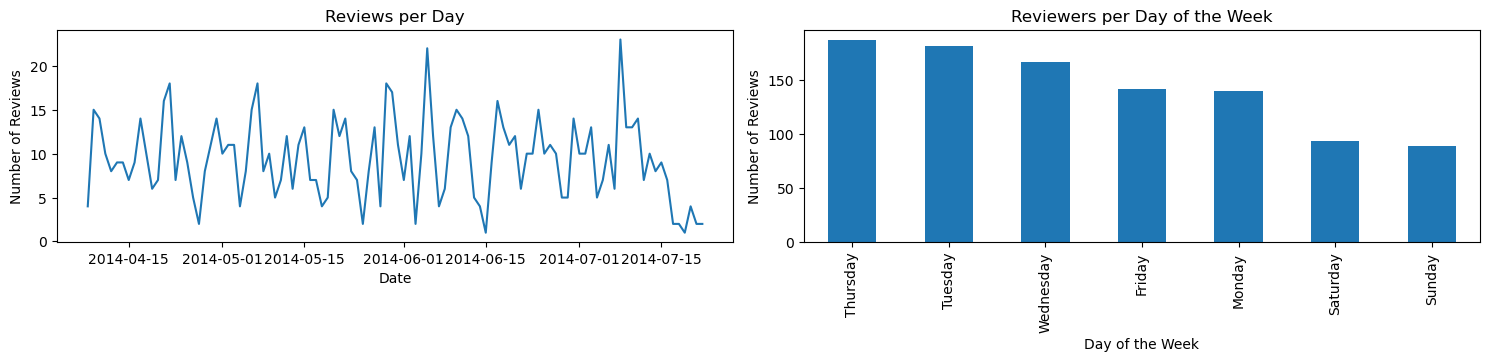

In [ ]:

reviewers_per_day = top_1000['date'].value_counts().sort_index()

# Count of messages per sender
reviewer_per_sender = top_1000['reviewerName'].value_counts()

# Count of messages per day of the week
reviewers_per_day_of_week = top_1000['day_of_week'].value_counts()


# Plotting the results for visual analysis
plt.figure(figsize=(15, 6))

# Messages per day
plt.subplot(2, 2, 1)
reviewers_per_day.plot(kind='line')
plt.title('Reviews per Day')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')

# # Messages per sender
# plt.subplot(2, 2, 2)
# reviewer_per_sender.plot(kind='bar')
# plt.title('Messages per Sender')
# plt.xlabel('Sender')
# plt.ylabel('Number of Messages')
# plt.xticks(rotation=45)

# Messages per day of the week
plt.subplot(2, 2, 2)
reviewers_per_day_of_week.plot(kind='bar')
plt.title('Reviewers per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Reviews')



plt.tight_layout()
plt.show()

/var/folders/8j/79nwp_x57b9c7jnp81cswm1r0000gn/T/ipykernel_461/3380500331.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_1000['sentiment'] = top_1000['reviewText'].apply(lambda x: analyze_sentiment(x))
/var/folders/8j/79nwp_x57b9c7jnp81cswm1r0000gn/T/ipykernel_461/3380500331.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_1000['polarity'] = top_1000['sentiment'].apply(lambda x: x.polarity)
/var/folders/8j/79nwp_x57b9c7jnp81cswm1r0000gn/T/ipykernel_461/3380500331.py:12: SettingWithCopyWarni

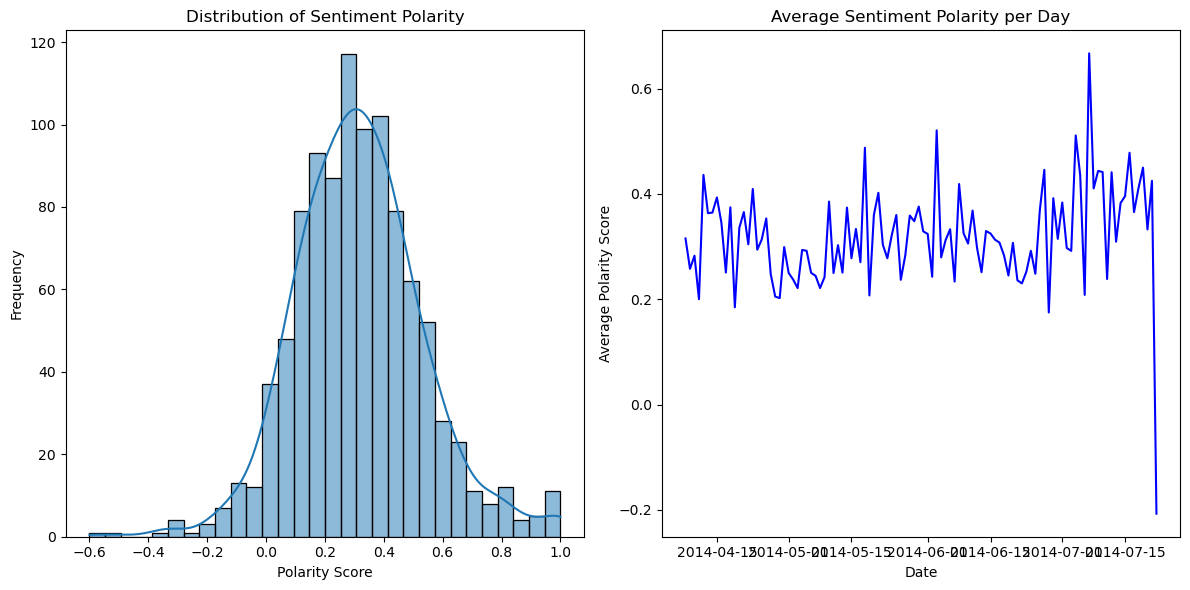

In [ ]:
from textblob import TextBlob

# Sentiment Analysis Function
def analyze_sentiment(message):
    return TextBlob(message).sentiment

# Apply sentiment analysis to each message
top_1000['sentiment'] = top_1000['reviewText'].apply(lambda x: analyze_sentiment(x))

# Extracting sentiment polarity and subjectivity
top_1000['polarity'] = top_1000['sentiment'].apply(lambda x: x.polarity)
top_1000['subjectivity'] = top_1000['sentiment'].apply(lambda x: x.subjectivity)

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment Polarity Distribution
plt.figure(figsize=(12, 6))

# Distribution of Polarity Scores
plt.subplot(1, 2, 1)
sns.histplot(top_1000['polarity'], kde=True, bins=30)
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')

# Average Sentiment Polarity per Day
avg_polarity_per_day = top_1000.groupby('date')['polarity'].mean()
plt.subplot(1, 2, 2)
avg_polarity_per_day.plot(kind='line', color='blue')
plt.title('Average Sentiment Polarity per Day')
plt.xlabel('Date')
plt.ylabel('Average Polarity Score')

plt.tight_layout()
plt.show()

In [ ]:
# First, install necessary libraries
#!pip install gensim nltk

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.models.ldamodel import LdaModel

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Define a function for text preprocessing
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha()]  # Remove non-alphabetic tokens
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return tokens

# Apply preprocessing to chat messages
top_1000['processed_message'] = top_1000['reviewText'].apply(preprocess_text)

# Creating a dictionary and corpus needed for topic modeling
dictionary = corpora.Dictionary(top_1000['processed_message'])
corpus = [dictionary.doc2bow(text) for text in top_1000['processed_message']]

# Running LDA model
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# Displaying the topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shiqinzeng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shiqinzeng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NameError: name 'top_1000' is not defined

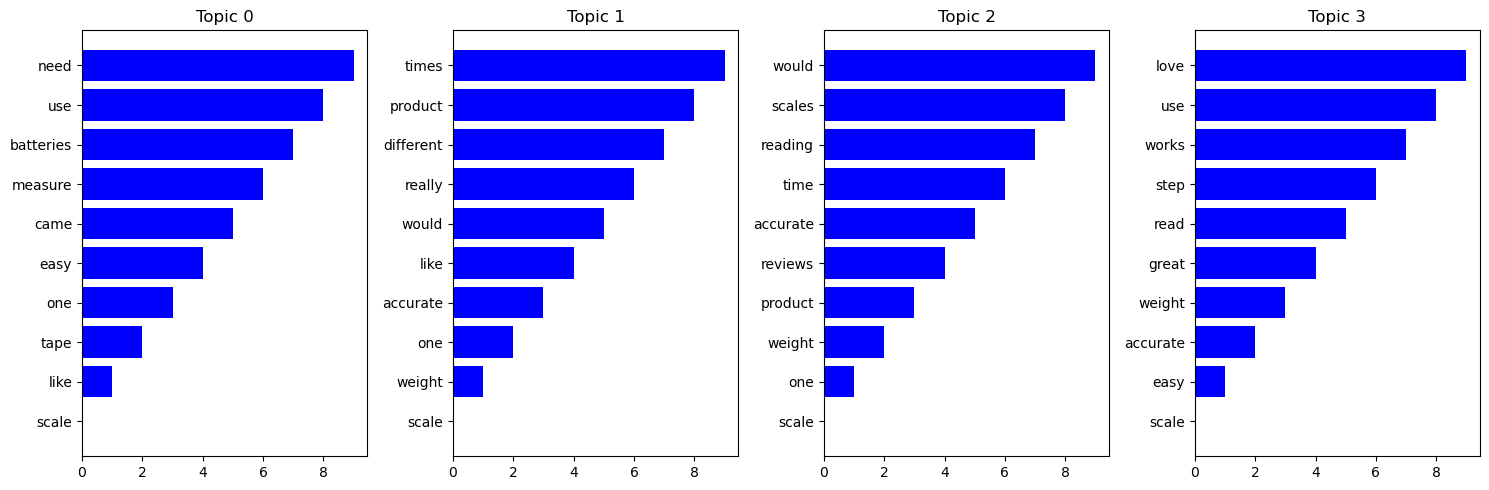

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Number of words to display per topic
num_words = 10

# Retrieve the words for each topic
topics = {i: [word for word, _ in lda_model.show_topic(i, topn=num_words)] for i in range(lda_model.num_topics)}

# Convert to DataFrame for easier plotting
topics_df = pd.DataFrame(topics)

# Plotting
plt.figure(figsize=(15, 5))
for i in topics_df.columns:
    plt.subplot(1, len(topics_df.columns), i+1)
    plt.barh(topics_df[i], range(len(topics_df[i])), color='blue')
    plt.title(f'Topic {i}')
    plt.yticks(range(len(topics_df[i])), topics_df[i])
plt.tight_layout()
plt.show()

In [ ]:
df3 = getDF('metadata.json.gz')
df3

,asin,salesRank,imUrl,categories,title,description,price,related,brand
0,0001048791,{'Books': 6334800},http://ecx.images-amazon.com/images/I/51MKP0T4DBL.jpg,[[Books]],"The Crucible: Performed by Stuart Pankin, Jerome Dempsey &amp; Cast",NaN,NaN,NaN,NaN
1,0000143561,{'Movies & TV': 376041},http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif,"[[Movies & TV, Movies]]","Everyday Italian (with Giada de Laurentiis), Volume 1 (3 Pack): Italian Classics, Parties, Holidays","3Pack DVD set - Italian Classics, Parties and Holidays.",12.99,"{'also_viewed': ['B0036FO6SI', 'B000KL8ODE', '000014357X', 'B0037718RC', 'B002I5GNVU', 'B000RBU4BM'], 'buy_after_viewing': ['B0036FO6SI', 'B000KL8ODE', '000014357X', 'B0037718RC']}",NaN
2,0000037214,{'Clothing': 1233557},http://ecx.images-amazon.com/images/I/31mCncNuAZL.jpg,"[[Clothing, Shoes & Jewelry, Girls], [Clothing, Shoes & Jewelry, Novelty, Costumes & More, Costumes & Accessories, More Accessories, Kids & Baby]]",Purple Sequin Tiny Dancer Tutu Ballet Dance Fairy Princess Costume Accessory,NaN,6.99,"{'also_viewed': ['B00JO8II76', 'B00DGN4R1Q', 'B00E1YRI4C']}",Big Dreams
3,0000032069,NaN,http://ecx.images-amazon.com/images/I/51EzU6quNML._SX342_.jpg,"[[Sports & Outdoors, Other Sports, Dance, Clothing, Girls, Skirts]]",Adult Ballet Tutu Cheetah Pink,NaN,7.89,"{'also_bought': ['0000032050', 'B00D0DJAEG', '0000032042', 'B00D0F450I', 'B00D2JTMS2', 'B00D0FDUAY', 'B00D2JSRFQ', '0000032034', 'B00D0D5F6S', 'B00D2JRWWA', 'B00D0FIIJM', 'B00D0FCQQI', 'B00EXVN9PU', 'B0041EOTJO', 'B004PYEE8G', 'B001GTKPDQ', 'B00EON0SJ2', 'B005HMHOQ4', 'B002XZMGGQ'], 'also_viewed': ['B00D0F450I', '0000032050', 'B00D2JTMS2', '0000032042', 'B004PYEE8G', 'B00JHNSNSM', 'B00D0DJAEG', 'B00D2JSRFQ', 'B00D0FCQQI', 'B00D2JRWWA', 'B003AVNY6I', 'B0071KR2LC', 'B00GOR07RE', 'B00D0FIIJM', 'B005F50FXC', 'B0079MCIMU', 'B00D0FDUAY', 'B00H3RYN3I', 'B005C4Y4F6', 'B007IEFT84', 'B00D0D5F6S', 'B002BZX8Z6', 'B00JHONN1S', 'B008F0SU0Y', 'B00FNNFXAG', 'B007R2RM8W', 'B007VM3AMK', 'B00C0PLENA', 'B00BJGG6VG', 'B00E1YRI4C', 'B00IIK61WA', 'B009UC638W', 'B00KZN6RVI', 'B00CSFEENY', 'B002GZGI4E', 'B00HSOJJ94', 'B00LIPP4VG', 'B009RXWNSI', 'B00E87F196', 'B005HMHOQY', 'B00J6S9MSS', '0000032034', 'B00CJQGNJK', 'B008FCA0F0', 'B0056LG7GY', 'B00DPQWCZ2', 'B00I3PV0US', 'B00KZN6IVW', 'B0054TBWKO', 'B00I2S01I...",BubuBibi
4,0000031909,{'Toys & Games': 201847},http://ecx.images-amazon.com/images/I/41xBoP0FVzL._SY300_.jpg,"[[Sports & Outdoors, Other Sports, Dance]]",Girls Ballet Tutu Neon Pink,High quality 3 layer ballet tutu. 12 inches in length,7.00,"{'also_bought': ['B002BZX8Z6', 'B00JHONN1S', '0000031895', 'B00D2K1M3O', '0000031852', 'B00D0WDS9A', 'B00D10CLVW', 'B00D103F8U', 'B003AVEU6G', 'B00D2K0PA0', 'B002GZGI4E', 'B00D0ZF44Y', 'B008F0SMUC', 'B00D0GCI8S', 'B008F0SU0Y', 'B002YSCPZY', '0448408775', 'B002R0FABA', 'B008GHWNWC', 'B002R0FA24', 'B001GTKPEK', 'B006XA7KZO', 'B001GZUQ9S', 'B00613VNL0', 'B003IEDM9Q', 'B003LTOZK8', 'B003AVNY6I', 'B008UBQZKU', 'B001AQD8VQ', 'B003ILA0L2', 'B00AFDOPDA', 'B002R0F7FE'], 'also_viewed': ['B002BZX8Z6', 'B00JHONN1S', 'B008F0SU0Y', 'B00E1YRI4C', 'B00AFDOPDA', 'B002GZGI4E', 'B00CEUWY8K', 'B003IEDM9Q', 'B00HSOJB9M', '0000031895', 'B003AVKOP2', 'B005C4Y4F6', 'B008F0SMUC', 'B00362QGW0', 'B008UD01L2', 'B00FAZ5ZE6', 'B008F0SY6O', 'B00DPLLQR2', 'B00CEUWUZC', 'B004PYEE8G', 'B003AVNY6I', 'B00CEUX0D8', 'B00JHNSNSM', 'B00D10CLVW', 'B00D23MC6W', 'B007XAI53E', 'B008X6CBS2', 'B004PEI45U', 'B005HMHOQ4', 'B002C3Y6WG', 'B00HSC8O74', 'B008BMGHM4', 'B00CEUWTFS', 'B00FNNFXAG', 'B00CYBU84G', 'B00D9C32NI', 'B0046W9T8...",Unknown
...,...,...,...,...,...,...,...,...,...
9430083,B00LZFHL7Y,NaN,"http://ecx.images-amazon.com/images/I/41RDitlHxRL._BO2,204,203,200_PIsitb-sticker-v3-big,TopRight,0,-55_SX278_SY278_PIkin4,BottomRight,1,22_AA300_SH20_OU01_.jpg","[[Books, Literature & Fiction, Erotica], [Kindle Store, Kindle eBooks, Literature & Fiction, Erotica, Humorous], [Kindle Store, Kindle eBooks, Literature & Fiction, Erotica, Thrille

In [ ]:
df3[df3["asin"] == "B001KXZ808"]

,asin,salesRank,imUrl,categories,title,description,price,related,brand
3816667,B001KXZ808,{'Health & Personal Care': 32},http://ecx.images-amazon.com/images/I/41pqd-hroEL._SY300_.jpg,"[[Health & Personal Care, Medical Supplies & Equipment, Activity, Health & Wellness Monitors, Body Weight Scales]]","EatSmart Precision Digital Bathroom Scale w/ Extra Large Lighted Display, 400 lb. Capacity and &quot;Step-On&quot; Technology [2014 VERSION] - 10,000+ Reviews EatSmart Guaranteed Accurate","NEW FEATURES [2014 VERSION]EatSmart ""Step-On"" technology allows you to simply step on the scale and get your weights. No more tapping to activate the scale! Increased capacity to 400 pounds with the same precision and repeatability that makes our products great!Overview:The EatSmart Bathroom Scale is the ideal way to track your weight loss quickly and easily. Simply step on, and in seconds you'll have an accurate readout to the nearest .2 lbs on the EatSmart's oversized 3.5"" Accubright LCD display. With EatSmart's proprietary new ""step-on"" technology there is no more tapping to turn the scale on!!! The LCD display also contains a cool-blue backlight, allowing for easy viewing even in the most low light areas of the bathroom or home.Industry Leading Design and Accuracy:The EatSmart Digital Bathroom Scale is also not only easy to use but also extremely accurate, engineered to the highest precision standards. The four high-gauge EatSmart Precision sensors ensure that you will get an ...",39.5,"{'also_bought': ['B001N07KUE', 'B003E7AZQA', 'B000FYZMYK', 'B004164SRA', 'B002CM6TVI', 'B000QURRUK', 'B001N0D7GA', 'B00HD0DA8E', 'B000G7YW74', 'B000G7YW7Y', 'B002VAPHXW', 'B00HARZKVU', 'B003NFO528', 'B0007SMLUM', 'B0009A0LDM', 'B002CM8TZC', 'B00ESIVBT4', 'B005OSUIYG', 'B004EZG9X4', 'B002XY7HDE', 'B00203PSRA', 'B005QB4P54', 'B001BO76WY', 'B00GFYOZJM', 'B000PSA6GU', 'B002KCO96C', 'B009EUPMFK', 'B004H44GB4', 'B0016L679A', 'B00512DYKA', 'B00DAMWXLO', 'B00ARTK9FA', 'B005QAQFFS', 'B0001M0Z6Q', 'B00017UT6W', 'B0048F38M0', 'B001T4ZAX8', 'B00B5H5BGA', 'B003XU3C7M', 'B004ILTH1K', 'B004BJT9OE', 'B0053XMT9O', 'B004D9P1A8', 'B004GNGID0'], 'also_viewed': ['B00FX0S4DC', 'B0032TNPOE', 'B00472I1V2', 'B004L6NTHU', 'B00A8SLH8I', 'B002MK6QKO', 'B00CZPF5L2', 'B00IFRZVQI', 'B00G0X49VW', 'B00FX0S4B4', 'B009G2KTCW', 'B00FT8ZHHE', 'B00GJXCHT4', 'B004NXUAXW', 'B00FX0S4BO', 'B00G15O1QM', 'B0000E2PEI', 'B00CWM1QIY', 'B00F3J9G1W', 'B00I0GIEO0', 'B00FJ8PI3M', 'B00GBFEMU2', 'B003ATS2QC', 'B0014JRAAY', 'B00FRUEXS...",EatSmart
